# Loan 

## by (Pham Minh Nhat Anh )

## Preliminary Wrangling

> Briefly introduce your dataset here.

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?

### What is the structure of your dataset?

There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans
### What is/are the main feature(s) of interest in your dataset?
The Borrower's APR will be analyzied with many factors such as the borrower's rating, score, occupation and income that could influence change in borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's APR as Prosper Rating.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv("loan.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [13]:
df1=df.copy()

In [14]:
# drop columns
df1.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [16]:
df1.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## What factor affect the loan status ?


In [19]:
# count variable 
status_count=df["LoanStatus"].value_counts()
status_count

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [41]:
# get in order to rank 
status_order=df["LoanStatus"].value_counts().index
status_order

# get shape to caculate relative frequence
n_status=df["LoanStatus"].shape[0]
n_status

max_status=status_count[0]
max_status

# get the proportion of each bar chart 
max_pro=max_status/n_status
max_pro

# get tick for bar chart
tick_pro=np.arange(0,max_pro,0.05)

# get tick name 
tick_names=['{:0.2f}'.format(v) for v in tick_pro]
tick_names

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [16]:
# get shape to caculate relative frequence
n_status=df["LoanStatus"].shape[0]
n_status

max_status=status_count[0]
max_status

# get the proportion of each bar chart 
max_pro=max_status/n_status
max_pro

# get tick for bar chart
tick_pro=np.arange(0,max_pro,0.05)

# get tick name 
tick_names=['{:0.2f}'.format(v) for v in tick_pro]
tick_names

113937

###### Loan Status 

In [22]:
max_status=status_count[0]
max_status

56576

In [24]:
# get the proportion of each bar chart 
max_pro=max_status/n_status
max_pro

0.4965551137909546

In [32]:
# get tick for bar chart
tick_pro=np.arange(0,max_pro,0.05)

In [33]:
# get tick name 
tick_names=['{:0.2f}'.format(v) for v in tick_pro]
tick_names

['0.00',
 '0.05',
 '0.10',
 '0.15',
 '0.20',
 '0.25',
 '0.30',
 '0.35',
 '0.40',
 '0.45']

Text(0.5, 0, 'proportion of Loan Status')

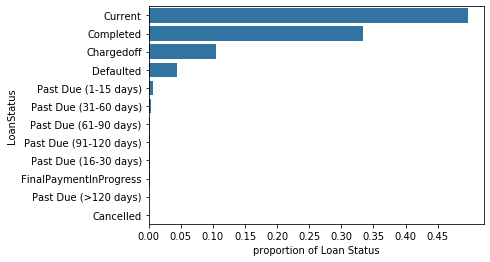

In [34]:
# draw bar chart 
base_color=sb.color_palette()[0]
sb.countplot( data=df,y="LoanStatus",color=base_color,order=status_order)
plt.xticks(tick_pro*n_status,tick_names)
plt.xlabel('proportion of Loan Status')

##### Income

#### Occupation 


In [ ]:
# get in order to rank 
status_order=df["LoanStatus"].value_counts().index
status_order

# get shape to caculate relative frequence
n_status=df["LoanStatus"].shape[0]
n_status

max_status=status_count[0]
max_status

# get the proportion of each bar chart 
max_pro=max_status/n_status
max_pro

# get tick for bar chart
tick_pro=np.arange(0,max_pro,0.05)

# get tick name 
tick_names=['{:0.2f}'.format(v) for v in tick_pro]
tick_names

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

Many people are currently in loan 

### Bivariate analyis 

#### Factors usually effect Loan include income, employment history , debt you own , apply for loan recently ,collateral , investment , monthly loan payment  

##### Loan Status with Income 

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

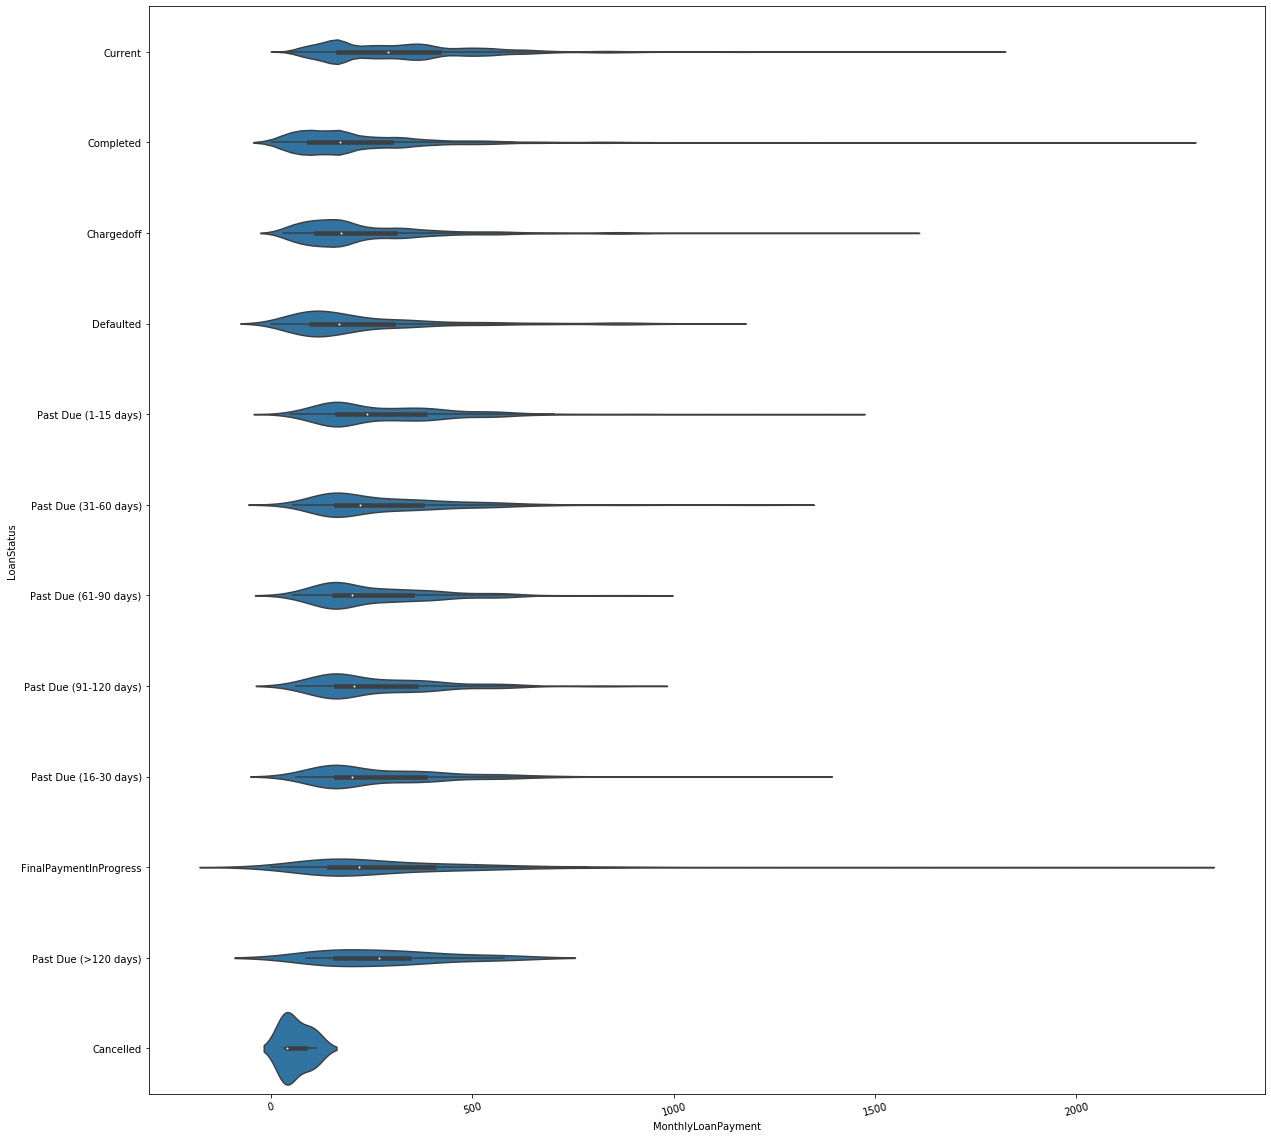

In [44]:
# violin plot 
plt.figure(figsize=(20,20))
base_color=sb.color_palette()[0]
sb.violinplot(data=df,x="MonthlyLoanPayment",y="LoanStatus",color=base_color, order=status_order)
plt.xticks(rotation=15)

In [ ]:
base_color=sb.color_palette()[0]
sb.countplot(data=df, x="generation_id", color=base_color,order=gen_order)

#### Investor and loan status 

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text xticklabel objects>)

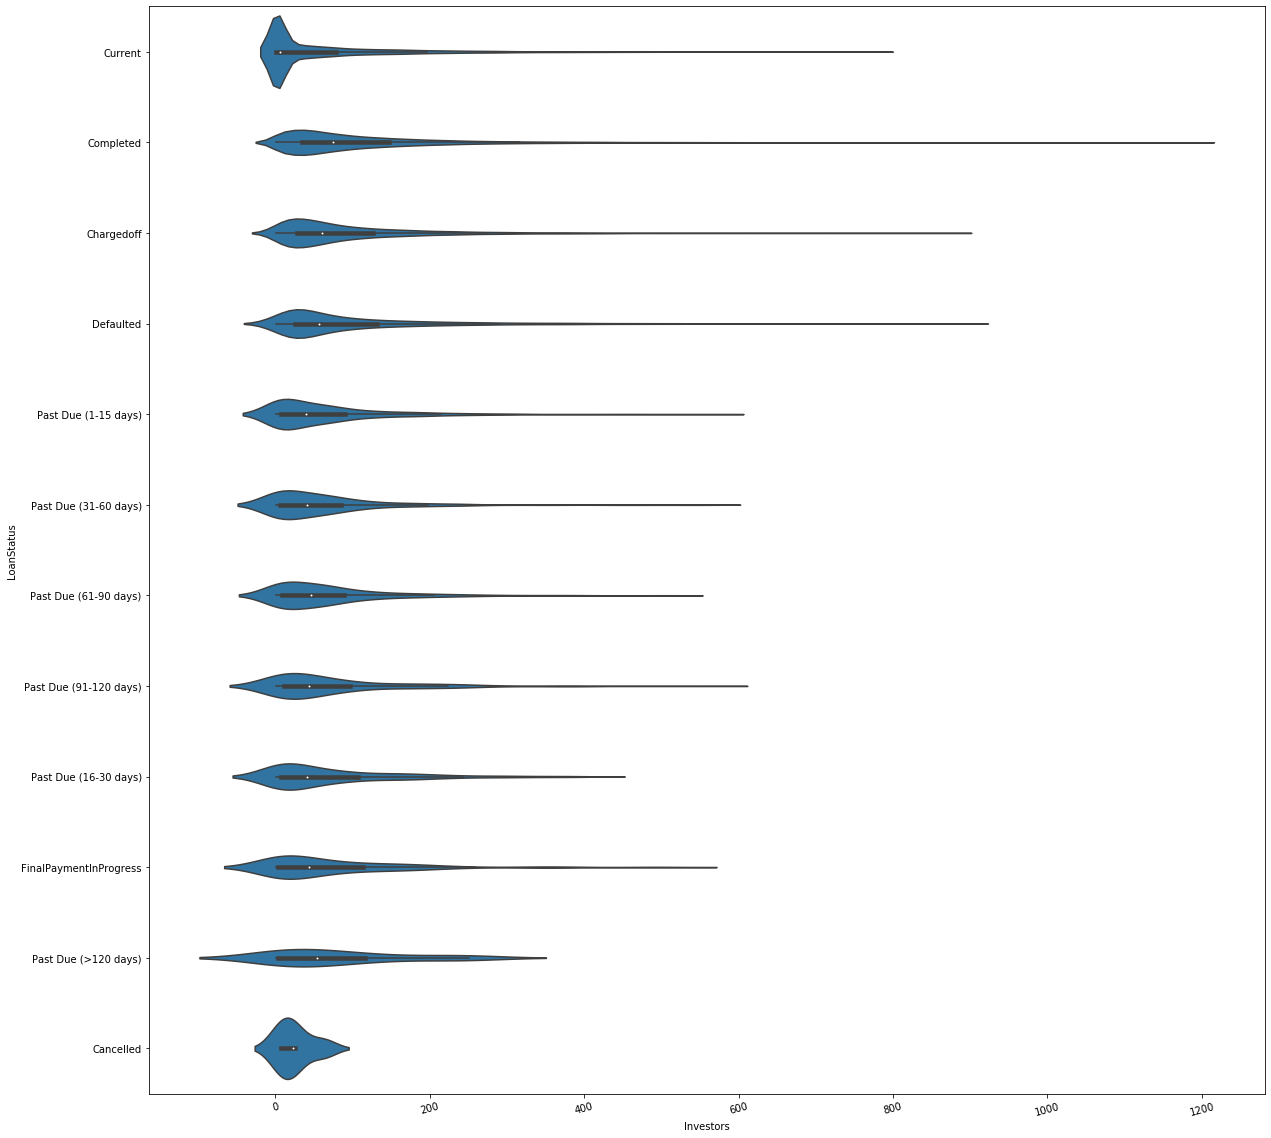

In [45]:
# violin plot 
plt.figure(figsize=(20,20))
base_color=sb.color_palette()[0]
sb.violinplot(data=df,x="Investors",y="LoanStatus",color=base_color, order=status_order)
plt.xticks(rotation=15)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

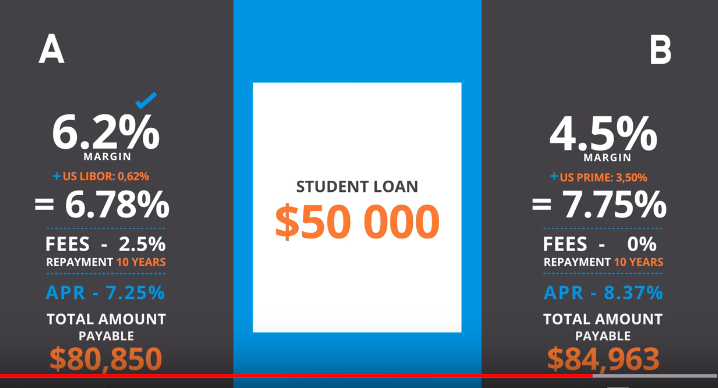

APR la interestrate + origination fee adn docuemtnation fee, provide yearly rate

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!